In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [3]:
print(plt.style.available)
plt.style.use('ggplot')
%matplotlib inline

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
# 랜덤에 의해 똑같은 결과를 재현하도록 seed값 고정
seed = 777
np.random.seed(seed)

In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_excel('시군구_변수2 (2).xlsx')
df

,시군구,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,총인구수,기초생활수급자,안전상비의약품,자동차,10만면당 자동차수
0,목포시,17.3,18.403979,1.528970,58.646693,117.755171,216551,3311,255,102292,47236.909550
1,여수시,29.3,20.934653,0.742100,49.157764,73.918711,274626,2038,203,143418,52223.023312
2,순천시,17.8,16.826932,0.546513,47.273704,72.343092,279225,1526,202,153944,55132.599158
3,나주시,16.8,23.296470,0.679426,50.935398,96.690926,115833,787,112,75025,64769.970561
4,광양시,25.3,14.324758,0.775685,35.648506,38.949293,151479,1175,59,93385,61648.809406
5,담양군,10.7,32.426017,0.518259,50.083836,124.120811,45923,238,57,31480,68549.528559
6,곡성군,8.3,37.925839,0.514498,58.799750,180.074235,27211,140,49,18243,67042.740068
7,구례군,7.1,36.338436,0.626733,44.192680,148.648106,24891,156,37,16530,66409.545619
8,고흥군,6.3,42.827717,0.560008,53.104181,49.885746,62142,348,31,38856,62527.759004
9,보성군,7.0,40.589750,0.731393,74.684522,77.259851,38830,284,30,26600,68503.734226


In [7]:
print(df.keys())

Index(['시군구', '재정자립도', '노인인구비율', '기초생활수급자비율', '10만명당 약국수', '10만명당 안전상비의약품점포수',
       '총인구수', '기초생활수급자', '안전상비의약품', '자동차', '10만면당 자동차수'],
      dtype='object')


In [8]:
df.describe()

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,총인구수,기초생활수급자,안전상비의약품,자동차,10만면당 자동차수
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,11.736364,30.734363,0.651772,48.901188,63.056108,82707.409091,610.545455,55.409091,49295.818182,64284.360159
std,6.225795,8.334377,0.240521,10.021058,46.255684,77715.750267,777.597198,71.690246,39679.073703,6707.545121
min,6.300000,14.324758,0.313306,23.695435,13.164130,24891.000000,119.000000,5.000000,16530.000000,47236.909550
25%,7.225000,24.487150,0.520277,43.964218,24.874895,36464.750000,205.750000,11.750000,23771.500000,61029.143144
50%,9.600000,33.375342,0.637783,48.891641,48.270522,49964.500000,313.000000,28.500000,33022.000000,66078.092735
75%,13.650000,36.484988,0.722845,52.698563,77.714807,84801.500000,523.500000,55.000000,53062.250000,68138.485687
max,29.300000,42.827717,1.528970,74.684522,180.074235,279225.000000,3311.000000,255.000000,153944.000000,74536.141150


In [9]:
df.dtypes

시군구                  object
재정자립도               float64
노인인구비율              float64
기초생활수급자비율           float64
10만명당 약국수           float64
10만명당 안전상비의약품점포수    float64
총인구수                  int64
기초생활수급자               int64
안전상비의약품               int64
자동차                   int64
10만면당 자동차수          float64
dtype: object

In [10]:
df.drop(["시군구", "총인구수", "기초생활수급자", "안전상비의약품", "자동차"], axis = 1)

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수
0,17.3,18.403979,1.528970,58.646693,117.755171,47236.909550
1,29.3,20.934653,0.742100,49.157764,73.918711,52223.023312
2,17.8,16.826932,0.546513,47.273704,72.343092,55132.599158
3,16.8,23.296470,0.679426,50.935398,96.690926,64769.970561
4,25.3,14.324758,0.775685,35.648506,38.949293,61648.809406
5,10.7,32.426017,0.518259,50.083836,124.120811,68549.528559
6,8.3,37.925839,0.514498,58.799750,180.074235,67042.740068
7,7.1,36.338436,0.626733,44.192680,148.648106,66409.545619
8,6.3,42.827717,0.560008,53.104181,49.885746,62527.759004
9,7.0,40.589750,0.731393,74.684522,77.259851,68503.734226


In [11]:
train_data = df.drop(["시군구", "총인구수", "기초생활수급자", "안전상비의약품", "자동차"], axis = 1)
train_data

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수
0,17.3,18.403979,1.528970,58.646693,117.755171,47236.909550
1,29.3,20.934653,0.742100,49.157764,73.918711,52223.023312
2,17.8,16.826932,0.546513,47.273704,72.343092,55132.599158
3,16.8,23.296470,0.679426,50.935398,96.690926,64769.970561
4,25.3,14.324758,0.775685,35.648506,38.949293,61648.809406
5,10.7,32.426017,0.518259,50.083836,124.120811,68549.528559
6,8.3,37.925839,0.514498,58.799750,180.074235,67042.740068
7,7.1,36.338436,0.626733,44.192680,148.648106,66409.545619
8,6.3,42.827717,0.560008,53.104181,49.885746,62527.759004
9,7.0,40.589750,0.731393,74.684522,77.259851,68503.734226


In [12]:
corr = train_data.corr()

In [13]:
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [14]:
from matplotlib import font_manager, rc

import matplotlib

font_location='c:/Windows/fonts/malgun.ttf'

font_name=font_manager.FontProperties(fname=font_location).get_name()

matplotlib.rc('font',family=font_name)

In [15]:
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

C:\Users\82104\AppData\Local\Temp\ipykernel_16628\519181320.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82104\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


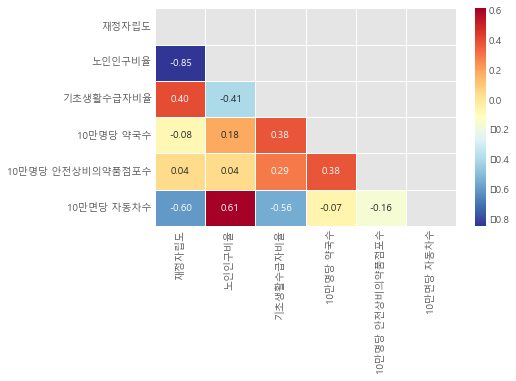

In [16]:
sns.heatmap(data=corr, 
           annot = True,
           mask=mask,
           fmt='.2f',
           linewidths=1,
           cmap='RdYlBu_r')
plt.show()

<AxesSubplot:>

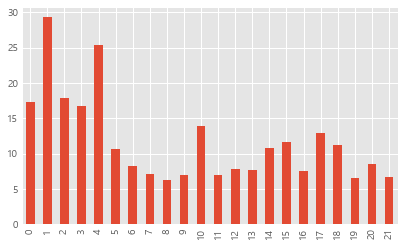

In [17]:
%matplotlib inline
df['재정자립도'].plot(kind='bar')

<AxesSubplot:>

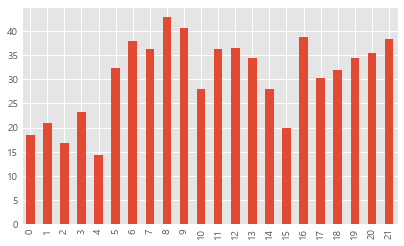

In [18]:
%matplotlib inline
df['노인인구비율'].plot(kind='bar')

<AxesSubplot:>

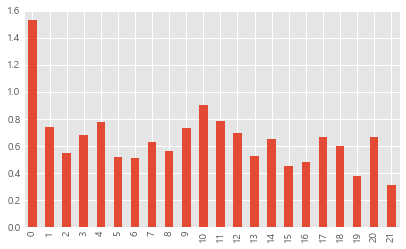

In [19]:
%matplotlib inline
df['기초생활수급자비율'].plot(kind='bar')

<AxesSubplot:>

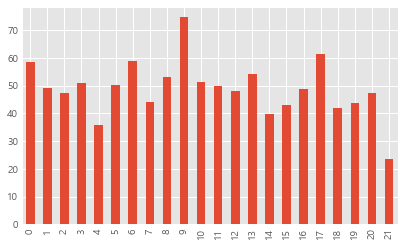

In [20]:
%matplotlib inline
df['10만명당 약국수'].plot(kind='bar')

<AxesSubplot:>

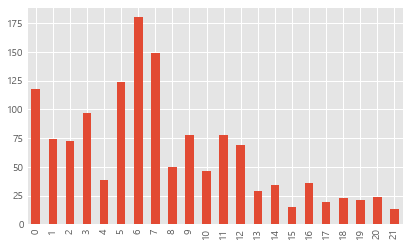

In [21]:
%matplotlib inline
df['10만명당 안전상비의약품점포수'].plot(kind='bar')

<AxesSubplot:>

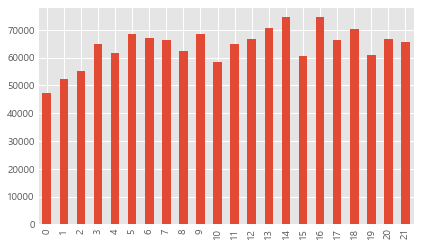

In [22]:
%matplotlib inline
df['10만면당 자동차수'].plot(kind='bar')

In [23]:
print(train_data.keys())


Index(['재정자립도', '노인인구비율', '기초생활수급자비율', '10만명당 약국수', '10만명당 안전상비의약품점포수',
       '10만면당 자동차수'],
      dtype='object')


In [24]:
train_data.head()

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수
0,17.3,18.403979,1.528970,58.646693,117.755171,47236.909550
1,29.3,20.934653,0.742100,49.157764,73.918711,52223.023312
2,17.8,16.826932,0.546513,47.273704,72.343092,55132.599158
3,16.8,23.296470,0.679426,50.935398,96.690926,64769.970561
4,25.3,14.324758,0.775685,35.648506,38.949293,61648.809406


In [25]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
%time print(minMaxScaler.fit(train_data))
train_data_minMaxScaled =  pd.DataFrame(minMaxScaler.transform(train_data), columns= train_data.keys())

from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()
%time print(maxAbsScaler.fit(train_data))
train_data_maxAbsScaled = pd.DataFrame(maxAbsScaler.transform(train_data), columns=train_data.keys())

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
%time print(standardScaler.fit(train_data))
train_data_standardScaled = pd.DataFrame(standardScaler.transform(train_data), columns=train_data.keys())

from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
%time print(robustScaler.fit(train_data))
train_data_robustScaled = pd.DataFrame(robustScaler.transform(train_data), columns=train_data.keys())


MinMaxScaler()
CPU times: total: 0 ns
Wall time: 8 ms
MaxAbsScaler()
CPU times: total: 0 ns
Wall time: 2.95 ms
StandardScaler()
CPU times: total: 0 ns
Wall time: 7.04 ms
RobustScaler()
CPU times: total: 0 ns
Wall time: 8.27 ms


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


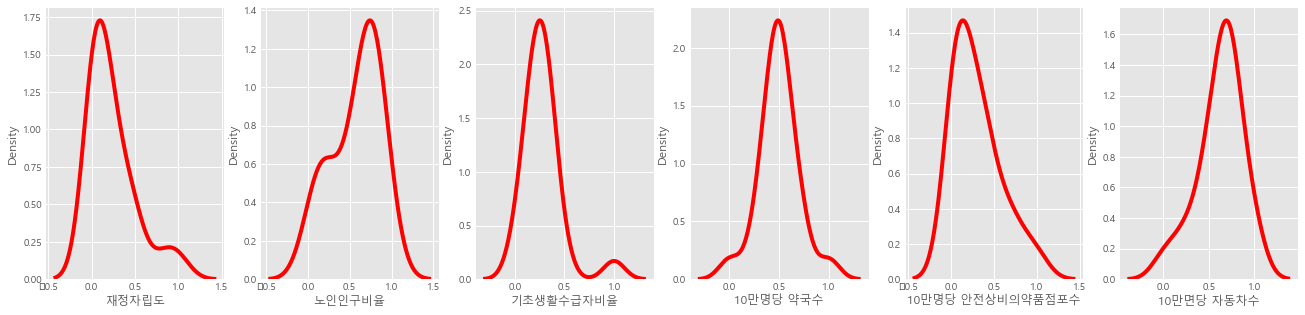

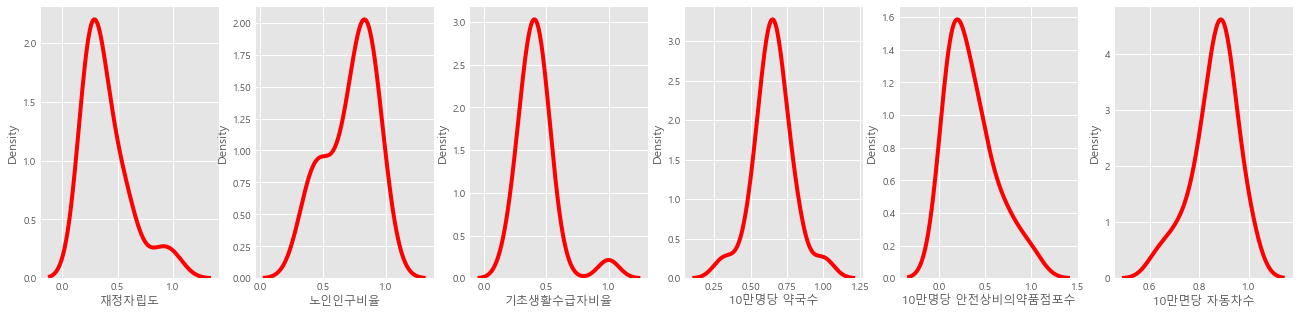

C:\Users\82104\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


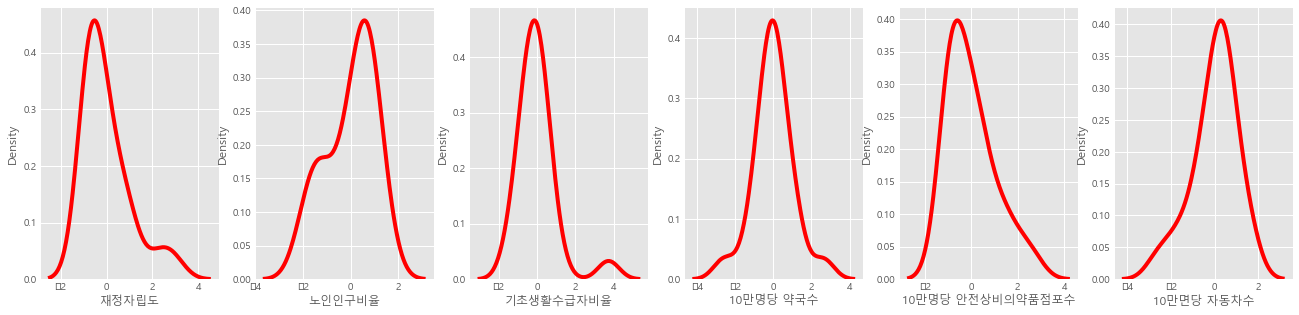

C:\Users\82104\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


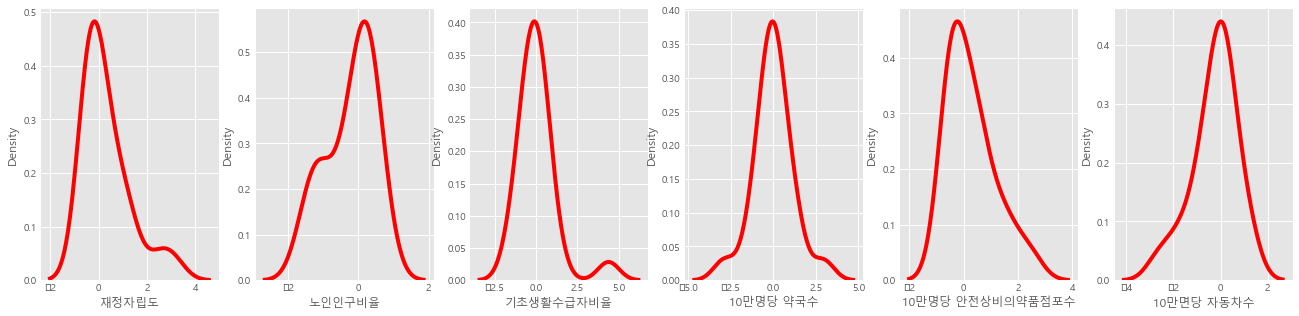

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols = 6, figsize =(20, 5))
sns.kdeplot(train_data_minMaxScaled['재정자립도'], ax = ax1, color ='r')
sns.kdeplot(train_data_minMaxScaled['노인인구비율'], ax = ax2, color ='r')
sns.kdeplot(train_data_minMaxScaled['기초생활수급자비율'], ax = ax3, color ='r')
sns.kdeplot(train_data_minMaxScaled['10만명당 약국수'], ax = ax4, color ='r')
sns.kdeplot(train_data_minMaxScaled['10만명당 안전상비의약품점포수'], ax = ax5, color ='r')
sns.kdeplot(train_data_minMaxScaled['10만면당 자동차수'], ax = ax6, color ='r')

plt.show()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols = 6, figsize =(20, 5))
sns.kdeplot(train_data_maxAbsScaled['재정자립도'], ax = ax1, color ='r')
sns.kdeplot(train_data_maxAbsScaled['노인인구비율'], ax = ax2, color ='r')
sns.kdeplot(train_data_maxAbsScaled['기초생활수급자비율'], ax = ax3, color ='r')
sns.kdeplot(train_data_maxAbsScaled['10만명당 약국수'], ax = ax4, color ='r')
sns.kdeplot(train_data_maxAbsScaled['10만명당 안전상비의약품점포수'], ax = ax5, color ='r')
sns.kdeplot(train_data_maxAbsScaled['10만면당 자동차수'], ax = ax6, color ='r')

plt.show()


fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols = 6, figsize =(20, 5))
sns.kdeplot(train_data_standardScaled['재정자립도'], ax = ax1, color ='r')
sns.kdeplot(train_data_standardScaled['노인인구비율'], ax = ax2, color ='r')
sns.kdeplot(train_data_standardScaled['기초생활수급자비율'], ax = ax3, color ='r')
sns.kdeplot(train_data_standardScaled['10만명당 약국수'], ax = ax4, color ='r')
sns.kdeplot(train_data_standardScaled['10만명당 안전상비의약품점포수'], ax = ax5, color ='r')
sns.kdeplot(train_data_standardScaled['10만면당 자동차수'], ax = ax6, color ='r')

plt.show()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols = 6, figsize =(20, 5))
sns.kdeplot(train_data_robustScaled['재정자립도'], ax = ax1, color ='r')
sns.kdeplot(train_data_robustScaled['노인인구비율'], ax = ax2, color ='r')
sns.kdeplot(train_data_robustScaled['기초생활수급자비율'], ax = ax3, color ='r')
sns.kdeplot(train_data_robustScaled['10만명당 약국수'], ax = ax4, color ='r')
sns.kdeplot(train_data_robustScaled['10만명당 안전상비의약품점포수'], ax = ax5, color ='r')
sns.kdeplot(train_data_robustScaled['10만면당 자동차수'], ax = ax6, color ='r')

plt.show()


In [27]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

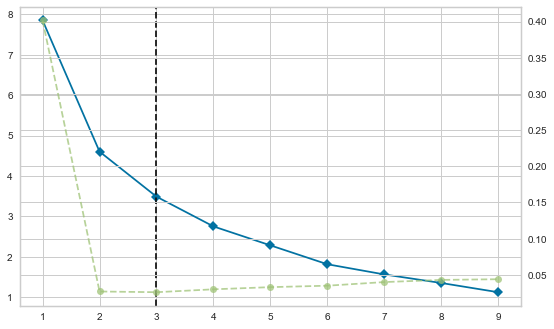

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(train_data_minMaxScaled)

C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

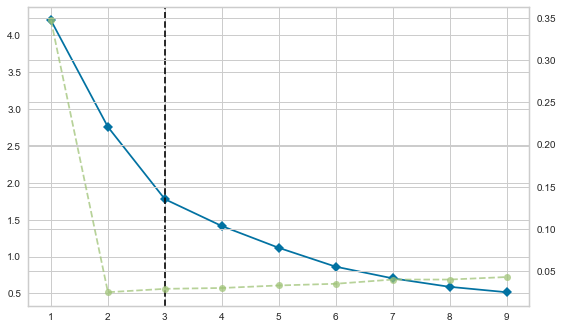

In [29]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(train_data_maxAbsScaled)


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

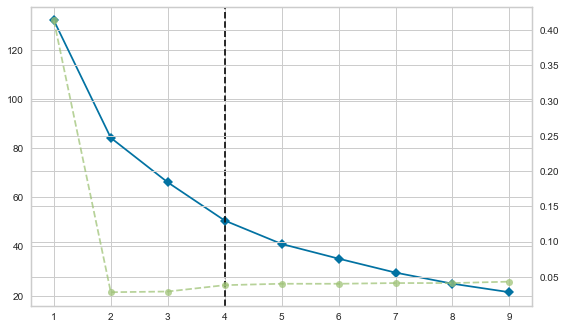

In [30]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(train_data_standardScaled)


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

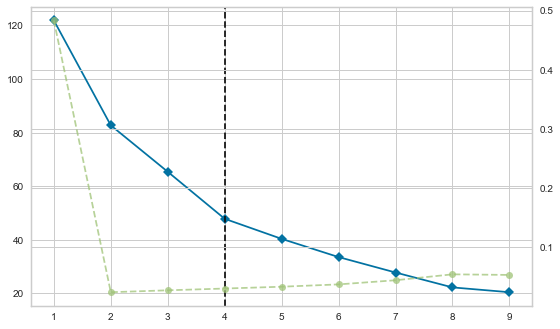

In [31]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(train_data_robustScaled)

In [32]:
from sklearn.decomposition import PCA
# PCA 주성분분석
pca = PCA(random_state=1107)
X_p = pca.fit_transform(train_data_minMaxScaled)
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.505940
1    0.760009
2    0.860400
3    0.928193
4    0.971169
5    1.000000
dtype: float64

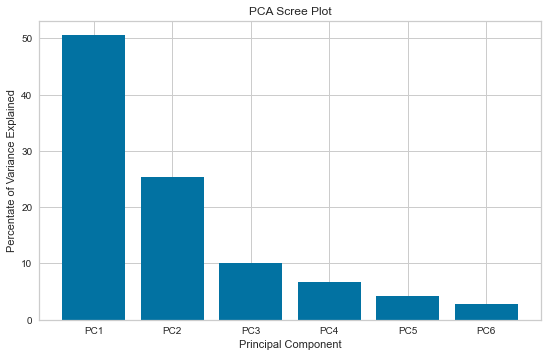

In [33]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [34]:
# X_pp = pd.DataFrame(X_p[:,:4], columns = ['PC1','PC2','PC3', 'PC4'], index = df['시군구'])
# X_pp

X_pp = pd.DataFrame(X_p[:,:3], columns = ['PC1','PC2','PC3'], index = df['시군구'])
X_pp


,PC1,PC2,PC3
시군구,,,
목포시,0.909101,0.512633,0.339658
여수시,0.876400,-0.021802,-0.063825
순천시,0.588725,-0.080388,-0.120708
나주시,0.302007,0.107312,-0.176691
광양시,0.758844,-0.372648,-0.194910
담양군,-0.134148,0.276099,-0.276667
곡성군,-0.265141,0.681180,-0.302350
구례군,-0.236022,0.427713,-0.297192
고흥군,-0.397879,0.072520,0.195709


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

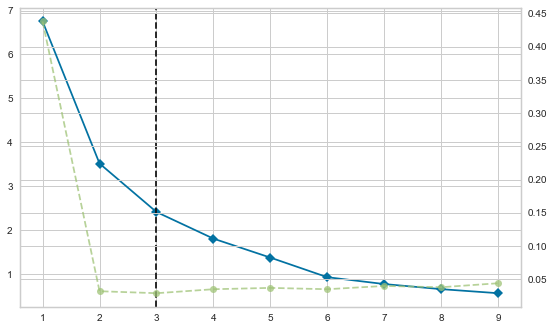

In [35]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(X_pp)


In [36]:
# Minmax 군집 3개
from sklearn.cluster import KMeans
k = 3
model = KMeans(n_clusters = k, random_state = 10)
model.fit(X_pp)
df['cluster'] = model.fit_predict(X_pp)

In [37]:
df

,시군구,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,총인구수,기초생활수급자,안전상비의약품,자동차,10만면당 자동차수,cluster
0,목포시,17.3,18.403979,1.528970,58.646693,117.755171,216551,3311,255,102292,47236.909550,0
1,여수시,29.3,20.934653,0.742100,49.157764,73.918711,274626,2038,203,143418,52223.023312,0
2,순천시,17.8,16.826932,0.546513,47.273704,72.343092,279225,1526,202,153944,55132.599158,0
3,나주시,16.8,23.296470,0.679426,50.935398,96.690926,115833,787,112,75025,64769.970561,0
4,광양시,25.3,14.324758,0.775685,35.648506,38.949293,151479,1175,59,93385,61648.809406,0
5,담양군,10.7,32.426017,0.518259,50.083836,124.120811,45923,238,57,31480,68549.528559,2
6,곡성군,8.3,37.925839,0.514498,58.799750,180.074235,27211,140,49,18243,67042.740068,2
7,구례군,7.1,36.338436,0.626733,44.192680,148.648106,24891,156,37,16530,66409.545619,2
8,고흥군,6.3,42.827717,0.560008,53.104181,49.885746,62142,348,31,38856,62527.759004,1
9,보성군,7.0,40.589750,0.731393,74.684522,77.259851,38830,284,30,26600,68503.734226,2


In [38]:
df[['시군구','cluster']].sort_values('cluster')

,시군구,cluster
0,목포시,0
15,무안군,0
4,광양시,0
10,화순군,0
2,순천시,0
1,여수시,0
3,나주시,0
19,완도군,1
18,장성군,1
17,영광군,1


In [39]:
from sklearn.decomposition import PCA
# PCA 주성분분석
pca = PCA(random_state=1107)
X_p = pca.fit_transform(train_data_standardScaled)
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.460863
1    0.731698
2    0.842497
3    0.917340
4    0.976443
5    1.000000
dtype: float64

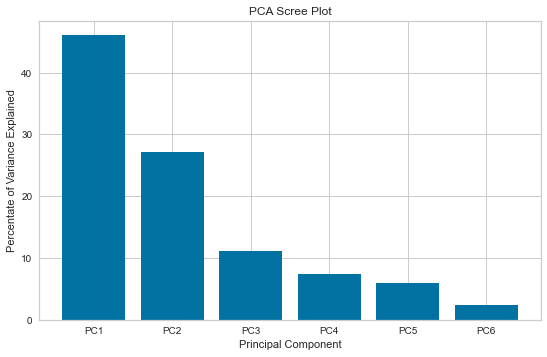

In [40]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [41]:
# X_pp = pd.DataFrame(X_p[:,:4], columns = ['PC1','PC2','PC3', 'PC4'], index = df['시군구'])
# X_pp

X_pp = pd.DataFrame(X_p[:,:3], columns = ['PC1','PC2','PC3'], index = df['시군구'])
X_pp


,PC1,PC2,PC3
시군구,,,
목포시,4.406541,1.981476,-0.668414
여수시,3.252660,-0.689199,0.372943
순천시,1.930460,-0.853117,0.567573
나주시,1.027876,0.138170,0.620167
광양시,2.474237,-2.098067,0.332990
담양군,-0.583697,0.734507,1.235897
곡성군,-0.807897,2.299901,1.761104
구례군,-0.738629,1.074837,1.677379
고흥군,-1.274443,0.628657,-0.487071


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

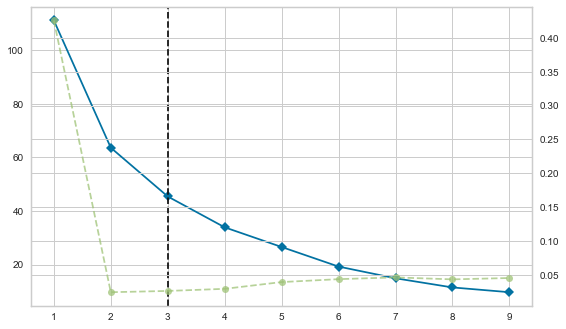

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(X_pp)

In [61]:
# standard 군집 4개
from sklearn.cluster import KMeans
k = 3
model = KMeans(n_clusters = k, random_state = 10)
model.fit(X_pp)
train_data_standardScaled['cluster'] = model.fit_predict(X_pp)

In [64]:
train_data_standardScaled['시군구'] = df['시군구']

In [67]:
train_data_standardScaled.set_index('시군구')

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수,cluster
시군구,,,,,,,
목포시,0.914673,-1.514277,3.732904,0.995388,1.210365,-2.601342,1
여수시,2.887496,-1.203488,0.384392,0.026206,0.240365,-1.840490,1
순천시,0.996873,-1.707951,-0.447928,-0.166228,0.205500,-1.396506,1
나주시,0.832472,-0.913437,0.117685,0.207771,0.744262,0.074101,1
광양시,2.229888,-2.015240,0.527312,-1.353605,-0.533429,-0.402170,1
담양군,-0.170380,0.207750,-0.568161,0.120794,1.351222,0.650840,0
곡성군,-0.564945,0.883175,-0.584166,1.011021,2.589344,0.420913,0
구례군,-0.762227,0.688228,-0.106553,-0.480918,1.893955,0.324291,0
고흥군,-0.893749,1.485167,-0.390500,0.429286,-0.291430,-0.268047,2


In [68]:
train_data_standardScaled[['시군구','cluster']].sort_values('cluster')

,시군구,cluster
11,장흥군,0
9,보성군,0
7,구례군,0
6,곡성군,0
5,담양군,0
0,목포시,1
10,화순군,1
3,나주시,1
2,순천시,1
1,여수시,1


In [69]:

train_data_standardScaled.groupby('cluster').count()

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수,시군구
cluster,,,,,,,
0,5,5,5,5,5,5,5
1,6,6,6,6,6,6,6
2,11,11,11,11,11,11,11


In [70]:
train_data_standardScaled.groupby('cluster').describe()

재정자립도                                                              \
        count      mean       std       min       25%       50%       75%   
cluster                                                                     
0         5.0 -0.610977  0.262374 -0.778667 -0.778667 -0.762227 -0.564945   
1         6.0  1.369518  0.970204  0.355706  0.853022  0.955773  1.921634   
2        11.0 -0.469293  0.384139 -0.893749 -0.754007 -0.647146 -0.121060   

                  노인인구비율            ... 10만명당 안전상비의약품점포수           10만면당 자동차수  \
              max  count      mean  ...              75%       max      count   
cluster                             ...                                         
0       -0.170380    5.0  0.731994  ...         1.893955  2.589344        5.0   
1        2.887496    6.0 -1.280324  ...         0.618287  1.210365        6.0   
2        0.191304   11.0  0.365634  ...        -0.622944  0.134155       11.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.429196  0.229499  0.106083  0.324291  0.420913  0.643852  0.650840  
1       -1.180918  0.974596 -2.601342 -1.729494 -1.157802 -0.531402  0.074101  
2        0.449048  0.743882 -0.556911 -0.019219  0.344822  0.950043  1.564363  

[3 rows x 48 columns]

In [71]:
train_data_standardScaled.groupby('cluster').mean()

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수
cluster,,,,,,
0,-0.610977,0.731994,-0.071278,0.680483,1.295307,0.429196
1,1.369518,-1.280324,0.895776,-0.004483,0.250692,-1.180918
2,-0.469293,0.365634,-0.456206,-0.306865,-0.725517,0.449048


In [72]:
train_data_standardScaled.groupby('cluster').std()

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수
cluster,,,,,,
0,0.262374,0.364756,0.520222,1.214683,0.991797,0.229499
1,0.970204,0.604315,1.475439,0.769919,0.656976,0.974596
2,0.384139,0.752117,0.538852,0.989094,0.367554,0.743882


In [73]:
train_data_standardScaled.groupby('cluster').min()

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수,시군구
cluster,,,,,,,
0,-0.778667,0.207750,-0.584166,-0.480918,0.314296,0.106083,곡성군
1,0.355706,-2.015240,-0.447928,-1.353605,-0.533429,-2.601342,광양시
2,-0.893749,-1.317759,-1.440334,-2.574470,-1.103996,-0.556911,강진군


In [74]:
train_data_standardScaled.groupby('cluster').median()

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수
cluster,,,,,,
0,-0.762227,0.688228,-0.106553,0.120794,1.351222,0.420913
1,0.955773,-1.358882,0.455852,0.116988,0.222932,-1.157802
2,-0.647146,0.458627,-0.390500,-0.170663,-0.872739,0.344822
